### LING 572 : Final Project
### Topic: Classification
#### Submitted by Harshal Sanap
#### Dated 12/18/2018

#### Project Description:
Insurance companies and banks always face the problem of deciding whether the loan should be approved or not for any given customer. The number one determining factor is always about what variables or attributes of the customer decide whether he or she is worthy of getting a loan. This is a pure classification problem and with this notebook we shall attempt to predict if a loan will be approved or not given a data set of over 600 customer records across 13 variables.

##### Problem: Classify or predict if loan will get approved or not

In [6]:
#Importing Libraries and reading the dataset

import pandas as pd #For reading and manipulating on the data
import numpy as np #For mathematical operations on arrays or matrices
import matplotlib.pyplot as plt # Basic plots
import seaborn as sns #Advanced statistical plots and visualization

raw = pd.read_csv("train_loan.csv") #Reading in the data set

### Section 1: Let's explore the data before doing any kind of prediction

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
raw.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the info function showed us that there are in total 614 records in this dataset and from above describe function output we get the distributions of all the numeric columns and we can see that loan amount and credit history columns have some missing values as the record count in these variables in less than 614. 

In [10]:
#Now that we saw the distributions of numerical variables above, let's understand the distributions of
# cateforical variables as below.
cat=['Property_Area','Credit_History','Education','Gender','Married','Self_Employed']
[print(raw[x].value_counts()) for x in cat]

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64


[None, None, None, None, None, None]

Above we did basic analysis of our variables, now lets get a more detailed analysis for them starting with understanding the distribution of important numerical variables

Text(0.5,1,'Applicant Income histogram')

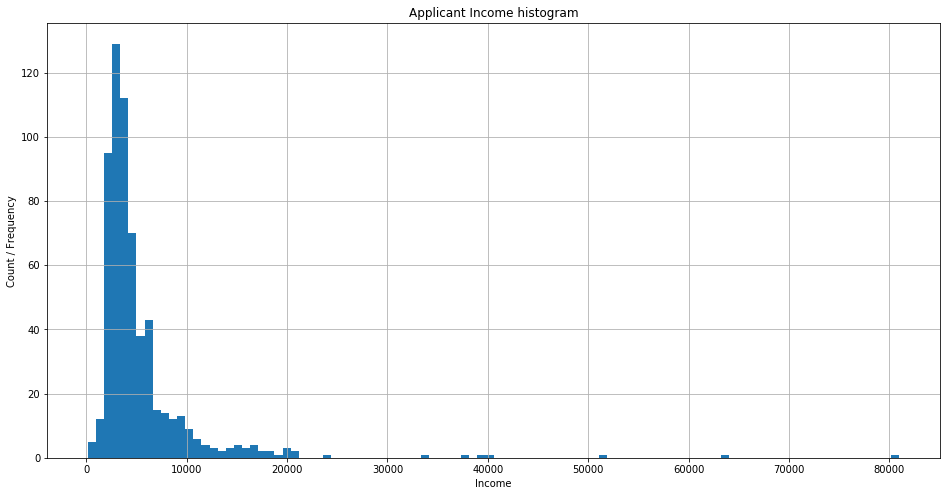

In [11]:
plt.figure(figsize=(16,8))
raw['ApplicantIncome'].hist(bins=100)
plt.ylabel('Count / Frequency')
plt.xlabel('Income')
plt.title('Applicant Income histogram')

#From the below plot we can see that most of the population have the income below 10k and there are very
# extreme values.

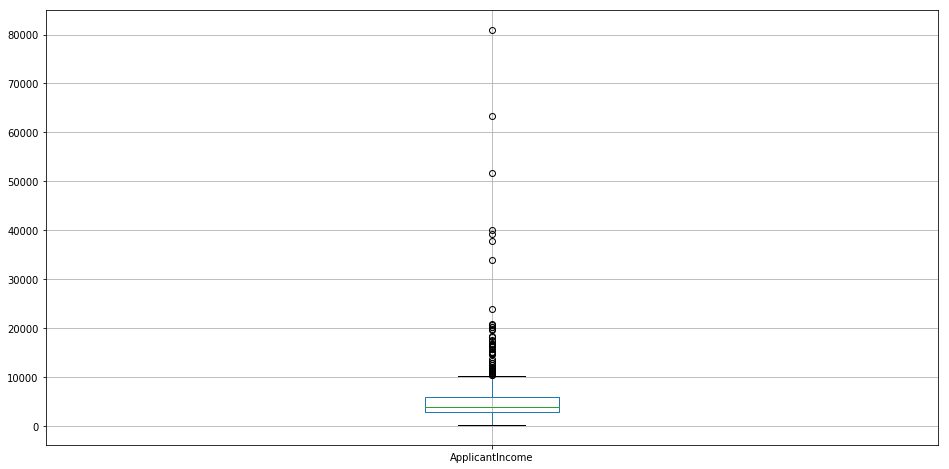

In [12]:
#Now lets check the distribution through box plot to get better perspective of outliers or extreme values
plt.figure(figsize=(16,8))
raw.boxplot('ApplicantIncome')

From the above plot we can confirm that we do have outliers in the data set for variable income which might be present because of the age distribution of the group. For example most of the population is new in their career and outliers are the ones who are very experienced or it could be on the basis of level of education. Lets try to consider another variable education while making the plots.

<Figure size 1152x576 with 0 Axes>

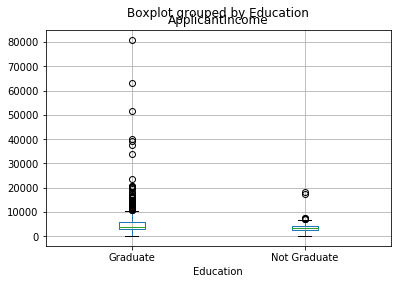

In [13]:
plt.figure(figsize=(16,8))
raw.boxplot('ApplicantIncome',by='Education')


From above we can see that the mean income of graduates is definitely higher than that of not graduates and also graduates tend to have more outliers or high income earner which seems to be a good thing for us. 

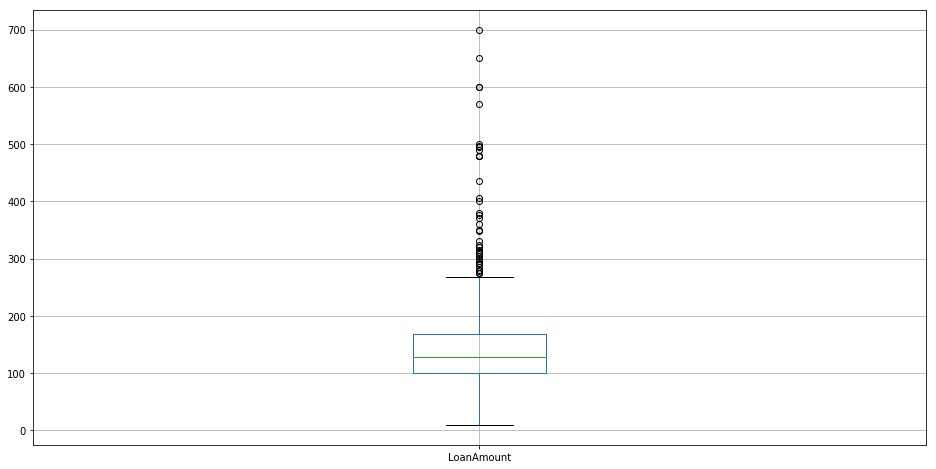

In [14]:
#Lets try plotting for another numerical variable, may be loan amount

plt.figure(figsize=(16,8))
raw.boxplot('LoanAmount')

Till this part we explored the dataset and we understand it better now. Let's clean the data by fixing the missing values and get the data ready to be run in a model.


In [15]:
#lets calculate the missing values in all the variables

def is_missing(x):
    return sum(x.isnull())

print("missing value count per column can be seen as below:\n",raw.apply(is_missing,axis=0))


missing value count per column can be seen as below:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Alright, now lets check how we can fill these missing values ahead.

In [16]:
#Filling the missing loan amount with the mean value as its a numeric variable.
raw['LoanAmount'].fillna(raw['LoanAmount'].mean(), inplace=True)

In [17]:
#Lets fill out the missing values in categorial variables with the most occuring values in them called mode
raw['Gender'].fillna(raw['Gender'].mode()[0], inplace=True)
raw['Married'].fillna(raw['Married'].mode()[0],inplace = True)
raw['Dependents'].fillna(raw['Dependents'].mode()[0],inplace = True)
raw['Loan_Amount_Term'].fillna(raw['Loan_Amount_Term'].mode()[0],inplace=True)
raw['Credit_History'].fillna(raw['Credit_History'].mode()[0],inplace=True)
raw['Self_Employed'].fillna(raw['Self_Employed'].mode()[0],inplace=True)

In [18]:
#Lets check again for missing values.

raw.apply(is_missing,axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#As we see that all the missing values are gone now, lets view some aggregations via pivot tables

raw.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [20]:
raw.pivot_table(values='ApplicantIncome',index='Self_Employed',columns='Education',aggfunc=np.median)

Education,Graduate,Not Graduate
Self_Employed,,
No,3846,3200
Yes,6250,4695


Till now we worked on data exploration and cleaning of the data. The data is now ready to be fed to machine learning models to perform prediction on whether we can classify whethere the loan will get approved or not!

### Section 2: Model Building

For predictive model building we would be using sklearn package. This package requires all the data to be numerical thus before we start implementing any machine learning models, lets convert our categorical values into numeric.

In [21]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    raw[i] = le.fit_transform(raw[i])
raw.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [22]:
raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


#### 1. Logistic Regression Model:
This is a classification model that predicts the probability of occurence of an event by fitting data to a logit function. The value of this probability thus lies always between 0 and 1. Based upon some threshold the probability value is rounded to either 0 or 1 thereby working as a classifier.

In [44]:
#Import Library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# Create logistic regression object
model = LogisticRegression()

#variables or input parameters to the model
outcome_var = 'Loan_Status'
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']

#run the model 
model.fit(raw[predictor_var],raw[outcome_var])

#Make predictions on training set:
predictions = model.predict(raw[predictor_var])

#Print accuracy
accuracy_log = metrics.accuracy_score(predictions,raw[outcome_var])
print ("Accuracy Logistic : %s" % "{0:.3%}".format(accuracy_log))


Accuracy Logistic : 80.945%


#### 2.Decision Tree:

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier()

#variables or input parameters to the model
outcome_var = 'Loan_Status'
predictor_var = ['Credit_History','Education','Married','Gender','Loan_Amount_Term','Self_Employed']

#run the model 
model.fit(raw[predictor_var],raw[outcome_var])

#Make predictions on training set:
predictions = model.predict(raw[predictor_var])

#Print accuracy
accuracy_dt = metrics.accuracy_score(predictions,raw[outcome_var])
print ("Accuracy Decision Tree: %s" % "{0:.3%}".format(accuracy_dt))


Accuracy Decision Tree: 82.410%


#### 3. Random Forest: 
Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

In [48]:
#Import Library
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

outcome_var = 'Loan_Status'

predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

#run the model 
model.fit(raw[predictor_var],raw[outcome_var])

#Make predictions on training set:
predictions = model.predict(raw[predictor_var])

#Print accuracy
accuracy_rf = metrics.accuracy_score(predictions,raw[outcome_var])
print ("Accuracy Random Forest: %s" % "{0:.3%}".format(accuracy_rf))

Accuracy Random Forest: 86.156%


Lets try improving the random forest model accuracy by using only the most important variables rather
than using all the variables like we did above.

In [49]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.466254
Dependents          0.131247
Loan_Amount_Term    0.115815
Property_Area       0.106069
Education           0.054454
Married             0.043073
Self_Employed       0.042935
Gender              0.040152
dtype: float64


In [50]:
#Let's try picking up the top 5 variables and see if it increases the model accuracy.

model = RandomForestClassifier(n_estimators=100)

outcome_var = 'Loan_Status'

predictor_var = ['Education','Dependents', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

#run the model 
model.fit(raw[predictor_var],raw[outcome_var])

#Make predictions on training set:
predictions = model.predict(raw[predictor_var])

#Print accuracy
accuracy_rf_opt = metrics.accuracy_score(predictions,raw[outcome_var])
print ("Accuracy Random Forest Optimized: %s" % "{0:.3%}".format(accuracy_rf_opt))

Accuracy Random Forest Optimized: 82.899%


Oops, looks like the model accuracy didn't improve and there is an explaintation behind that. As this is our training set accuracy there is a possiblity that our validation set accuracy would improve with this model which is a good thing.

#### 4. Support Vector Machine (SVM):
It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

In [47]:
from sklearn import svm

model = svm.SVC()

outcome_var = 'Loan_Status'

predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

#run the model 
model.fit(raw[predictor_var],raw[outcome_var])

#Make predictions on training set:
predictions = model.predict(raw[predictor_var])

#Print accuracy
accuracy_svm = metrics.accuracy_score(predictions,raw[outcome_var])
print ("Accuracy SVM : %s" % "{0:.3%}".format(accuracy_svm))

Accuracy SVM : 80.782%


### Conclusion:

As seen above we can see that we had the highest accuracy was found with the random forest alogirthm. For others the accuracy was a bit less compared to random forest. For all the above models the variables were predicted by assuming their importance from a real life situation and no specific approach for selecting most imporant variables was followed.


### How can we improve the model further or future work:

The accuracy of 86% is great but however this is the accuracy only on the training data set thus we need to get another test or validation data set and test out the accuracy there as well. Training our model only on the training set can make the model more prone to over fitting. The model would be said to be optimal if the accuracy scores of the training and test sets are not that different from each other. We can also improve the accuracy of the models by following different resampling and cross validation techniques which considers different samples of the same data set to make the model more accurate on test data set.
